## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

In [2]:
## Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [5]:
## descriptive summary of the dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [3]:
df.shape

(1599, 1)

In [4]:
## List down all the columns names
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [5]:
df['quality'].unique()

KeyError: 'quality'

In [12]:


df.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

In [7]:
## Duplicate records
df[df.duplicated()]

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
4      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
11    7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;...                                                                                                                     
27    7.9;0.43;0.21;1.6;0.106;10;37;0.9966;3.17;0.91...                                                                                                                     
40    7.3;0.45;0.36;5.9;0.074;12;87;0.9978;3.33;0.83...                                                                                                                     
65    7.2;0.725;0.05;4.65;0.086;4;11;0.9962;3.41;0.3...                                                                                                                     
...                                                 ...                                                                                                                     
1563  7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54...                                                                                                                     
1564  7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54...                                                                                                                     
1567  7.2;0.695;0.13;2;0.076;12;20;0.99546;3.29;0.54...                                                                                                                     
1581  6.2;0.56;0.09;1.7;0.053;24;32;0.99402;3.54;0.6...                                                                                                                     
1596  6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...                                                                                                                     

[240 rows x 1 columns]

In [8]:
## Remove the duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1359, 1)

In [10]:
## Correlation
df.corr()

ValueError: could not convert string to float: '7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5'

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: '7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5'

<Figure size 1000x600 with 0 Axes>

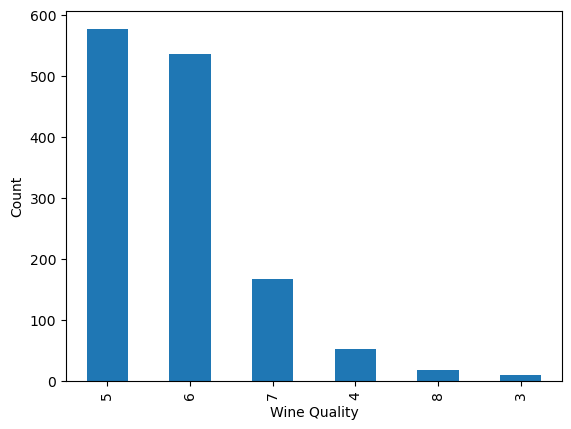

In [27]:
## Visualization
#conclusion- It is an imbalanced dataset
df.quality.value_counts().plot(kind='bar')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

In [28]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

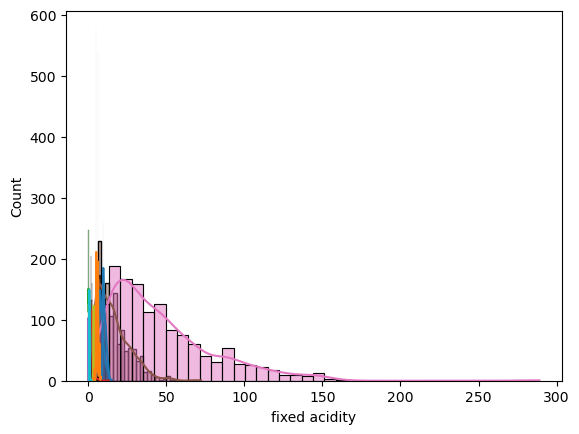

In [29]:
for column in df.columns:
    sns.histplot(df[column],kde=True)

<AxesSubplot: xlabel='alcohol', ylabel='Count'>

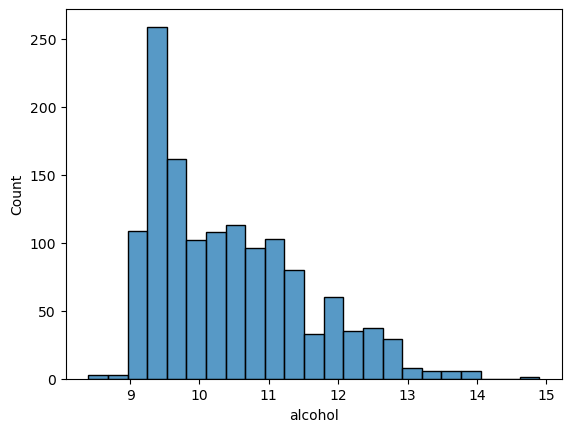

In [31]:
sns.histplot(df['alcohol'])

In [ ]:
#univariate,bivariate,multivariate analysis
sns.pairplot(df)

In [ ]:
##categorical Plot
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

In [36]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

<AxesSubplot: xlabel='alcohol', ylabel='pH'>

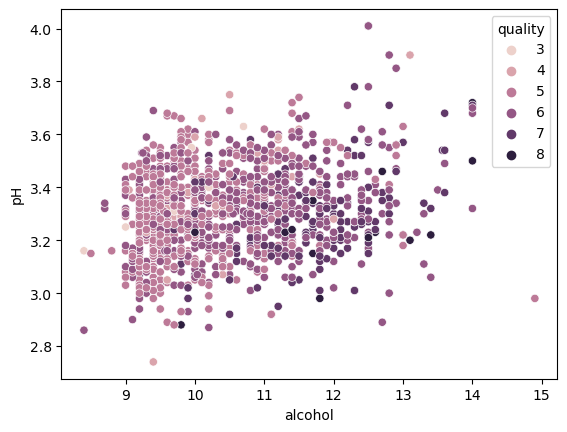

In [37]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df)